# Stats and Public Health Deliverable 2
### Viraj Kunthe
### 2022-05-13

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('mosquito_data_part_2.csv')

In [6]:
df.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049,9


### Part 1 - Basic Analysis
Convert the WNV Present column into a binary column, and create dummy variables from the Trap type column.

In [7]:
df['WNV Present'].value_counts()

negative    14501
positive     3994
Name: WNV Present, dtype: int64

In [8]:
df['WNV Present'] = df['WNV Present'].map({'negative': 0, 'positive': 1})

In [9]:
trap_type = pd.get_dummies(df['Trap type'])
trap_type

,CDC,GRAVID,OVI,SENTINEL
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
18490,0,1,0,0
18491,0,1,0,0
18492,0,1,0,0
18493,0,0,0,1


- What is the average number of mosquitoes for each month? What trends do you notice?

In [10]:
monthly_df = pd.DataFrame(df.groupby('Month')['Mosquito number'].apply(lambda x: x.sum()*1.0/x.count())).reset_index()
monthly_df.columns = ['Month', 'Avg Mosquitos']
monthly_df

,Month,Avg Mosquitos
0,5,2.761905
1,6,10.264442
2,7,11.551879
3,8,12.111321
4,9,8.394973
5,10,5.377778


The average number of mosquitos caught per month increases dramatically from month 5 to 6 and continues to increase until a peak in month 8 and then it starts decreasing gradually. This trend matches with the warmer months in a year and intuitively makes sense. 

### Part 2 - Statistical Analysis
Is there a statistically significant difference between the different mosquito species when looking at the occurrence of West Nile Virus?

In [11]:
species = pd.get_dummies(df['Species'])
species_df = pd.concat([species, df['WNV Present']], axis=1)
species_df.corr()

,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS,WNV Present
CULEX PIPIENS,1.000000,-0.868829,-0.072228,-0.148322,0.065388
CULEX RESTUANS,-0.868829,1.000000,-0.148808,-0.305582,-0.001498
CULEX SALINARIUS,-0.072228,-0.148808,1.000000,-0.025404,-0.045215
CULEX TERRITANS,-0.148322,-0.305582,-0.025404,1.000000,-0.111394
WNV Present,0.065388,-0.001498,-0.045215,-0.111394,1.000000


In [12]:
species_df.columns

Index(['CULEX PIPIENS', 'CULEX RESTUANS', 'CULEX SALINARIUS',
       'CULEX TERRITANS', 'WNV Present'],
      dtype='object')

In [13]:
from scipy.stats import pearsonr
for sp in list(species.columns):
    print(sp)
    print(pearsonr(species_df[sp], species_df['WNV Present']))

CULEX PIPIENS
(0.06538753509832308, 5.515168860545796e-19)
CULEX RESTUANS
(-0.0014976995950189362, 0.838612960927292)
CULEX SALINARIUS
(-0.045215379936002845, 7.658140564684094e-10)
CULEX TERRITANS
(-0.11139405854365565, 3.78940318963033e-52)


We start with the null hypothesis that none of the species have any effect on the presence of West Nile Virus.
The correlation coefficients are very close to 0 for all the mosquito species so there isn't much of a correlation between species and WNV present. The only one that stands out is Culex Territans which has a small negative correlation(coeff -0.11) with the presence of West Nile Virus. The p-value for this pair of variables is very low so this correlation is statistically significant and we can reject the null hypothesis.


- Which columns are positively correlated with the number of mosquitoes caught? Which columns are negatively correlated? Are these correlations statistically significant?

In [14]:
df.corr()['Mosquito number'].sort_values(ascending=False)

Mosquito number    1.000000
WNV Present        0.408034
Year               0.129326
Lat                0.096820
Week              -0.033900
Month             -0.040426
Lon               -0.151421
Name: Mosquito number, dtype: float64

In [15]:
 for item in ['WNV Present', 'Year', 'Lat', 'Week', 'Month', 'Lon']:
    print(item, pearsonr(df[item], df['Mosquito number']))

WNV Present (0.4080343968902982, 0.0)
Year (0.12932594549371101, 8.39305001636186e-70)
Lat (0.09681989674648858, 9.096861337579254e-40)
Week (-0.033899607544960506, 4.0028248035812614e-06)
Month (-0.04042643719660004, 3.8038755209713405e-08)
Lon (-0.15142112596890817, 2.765603982121051e-95)


WNV present, year and Lat are positively correlated with the number of mosquitos caught and Week, Month and Lon are negatively correlated. The p-values are very close to 0 to all of the correlations are statistically significant

Let's now make sure all the columns in the data frame are numerical, as this is a basic requirement for any kind of regression analysis.

In [16]:
# check the dataframe
df

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,-87.546049,9
...,...,...,...,...,...,...,...,...,...,...,...,...
18490,2016,36,3XX W 18TH ST,T043,GRAVID,2016-09-09 00:09:00,4,1,CULEX PIPIENS,41.857843,-87.635858,9
18491,2007,34,46XX N MILWAUKEE AVE,T003,GRAVID,2007-08-24 00:08:00,19,1,CULEX PIPIENS,41.965376,-87.758403,8
18492,2016,30,127XX S DOTY AVE,T115,GRAVID,2016-07-27 00:07:00,34,1,CULEX RESTUANS,41.662395,-87.590176,7
18493,2017,33,20XX N DOMINICK ST,T240B,SENTINEL,2017-08-17 00:08:00,50,1,CULEX RESTUANS,41.919197,-87.664758,8


In [17]:
df.columns

Index(['Year', 'Week', 'Address Block', 'Trap', 'Trap type', 'Date',
       'Mosquito number', 'WNV Present', 'Species', 'Lat', 'Lon', 'Month'],
      dtype='object')

In [30]:
# function to summarise all the categorical variables in a dataframe
def show_categorical(df):
    category_features = df.select_dtypes(include=['object', 'bool']).columns.values
    print(f'There are {len(category_features)} category features in this dataset.')
    print(f'category features are: {category_features}')
    display(df.select_dtypes(include='object').head())
    
show_categorical(df)

There are 5 category features in this dataset.
category features are: ['Address Block' 'Trap' 'Trap type' 'Date' 'Species']


,Address Block,Trap,Trap type,Date,Species
0,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,CULEX RESTUANS
1,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,CULEX RESTUANS
2,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,CULEX RESTUANS
3,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,CULEX RESTUANS
4,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,CULEX RESTUANS


As we can see, we are dealing with a substantial of categorical variables. We will need to convert these to numerical representations such that we can apply statistical modeling.

First, let's create a function to make it easier for us to explore the distribution of categorical variables.

This function should take the name of a categories column as an input and produce:

   - number of unique categories
   - Value counts per category
   - Percentage distribution of value counts per category
   - Countplot



In [26]:
# # function to summarise all the categorical variables in a dataframe

def explore_categorical(col_name, df): 
    if df[col_name].dtypes == 'object':
        unique_cat = len(df[col_name].unique())
        print()
        print(f"\033[1m\033[94m{col_name} percentage \n{20 * '-'}\033[0m") 
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))
        print()
        print(df[col_name].value_counts(normalize=True)*100.00)
        sns.countplot(y=col_name, data=df, order = df[col_name].value_counts().index, color="#58508d")
        
        print(f"\n\033[1m\033[94m{col_name} count \n{20 * '-'}\033[0m") 
        print(df[col_name].value_counts())
        print()
        
# # function to summarise all the categorical variables in a dataframe without the graph

def explore_categorical_no_graph(col_name, df): 
    if df[col_name].dtypes == 'object':
        unique_cat = len(df[col_name].unique())
        print()
        print(f"\033[1m\033[94m{col_name} percentage \n{20 * '-'}\033[0m") 
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))
        print()
        print(df[col_name].value_counts(normalize=True)*100.00)
        
        
        print(f"\n\033[1m\033[94m{col_name} count \n{20 * '-'}\033[0m") 
        print(df[col_name].value_counts())
        print()


Species percentage 
--------------------
Feature 'Species' has 4 unique categories

CULEX RESTUANS      64.157881
CULEX PIPIENS       29.662071
CULEX TERRITANS      4.958097
CULEX SALINARIUS     1.221952
Name: Species, dtype: float64

Species count 
--------------------
CULEX RESTUANS      11866
CULEX PIPIENS        5486
CULEX TERRITANS       917
CULEX SALINARIUS      226
Name: Species, dtype: int64



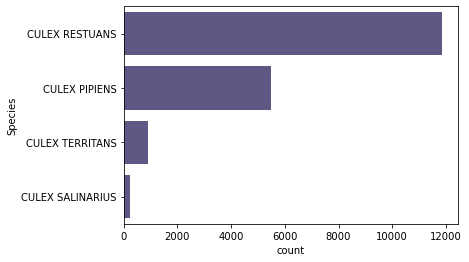

In [38]:
explore_categorical('Species',df)

Let us now conduct an exploratory analysis on the Adress Block column.

In [40]:
explore_categorical_no_graph('Address Block', df)


Address Block percentage 
--------------------
Feature 'Address Block' has 154 unique categories

100XX W OHARE AIRPORT       11.024601
41XX N OAK PARK AVE          2.206002
101XX S STONY ISLAND AVE     1.995134
52XX S KOLMAR AVE            1.886996
1XX N CENTRAL PARK DR        1.811300
                              ...    
29XX N KENNETH AVE           0.010814
54XX W PARKER AVE            0.005407
4XX W 127TH ST               0.005407
104XX S OGLESBY AVE          0.005407
21XX S HAMLIN AVE            0.005407
Name: Address Block, Length: 154, dtype: float64

Address Block count 
--------------------
100XX W OHARE AIRPORT       2039
41XX N OAK PARK AVE          408
101XX S STONY ISLAND AVE     369
52XX S KOLMAR AVE            349
1XX N CENTRAL PARK DR        335
                            ... 
29XX N KENNETH AVE             2
54XX W PARKER AVE              1
4XX W 127TH ST                 1
104XX S OGLESBY AVE            1
21XX S HAMLIN AVE              1
Name: Address Block, Length:

It is clear from the above data that compared to any other address, the 100XX W OHARE AIRPORT address has been checked the most number of times. It has a value count that is 5 times higher than the next best address.

It might be a good idea to have a column in the table that indicates whether any address is the airport address or not. This will be able to tell us the effect that the airport location has on our dependent variable.

In [48]:
df['is airport'] = np.where(df['Address Block'] == '100XX W OHARE AIRPORT', 1, 0)
df['is airport'].value_counts()

0    16456
1     2039
Name: is airport, dtype: int64

In [49]:
df['is airport'] = np.where(df['Address Block'] == '100XX W OHARE AIRPORT', 1, 0)

Let us now conduct an exploratory analysis on the Trap column which contains the trap id information

In [28]:
explore_categorical_no_graph('Trap', df)


Trap percentage 
--------------------
Feature 'Trap' has 190 unique categories

T002     2.195188
T114     1.838335
T031     1.800487
T008     1.762639
T138     1.643687
           ...   
T128A    0.005407
T135B    0.005407
T241     0.005407
T167     0.005407
T040     0.005407
Name: Trap, Length: 190, dtype: float64

Trap count 
--------------------
T002     406
T114     340
T031     333
T008     326
T138     304
        ... 
T128A      1
T135B      1
T241       1
T167       1
T040       1
Name: Trap, Length: 190, dtype: int64




Trap type percentage 
--------------------
Feature 'Trap type' has 4 unique categories

GRAVID      95.923222
CDC          2.941335
SENTINEL     1.130035
OVI          0.005407
Name: Trap type, dtype: float64

Trap type count 
--------------------
GRAVID      17741
CDC           544
SENTINEL      209
OVI             1
Name: Trap type, dtype: int64



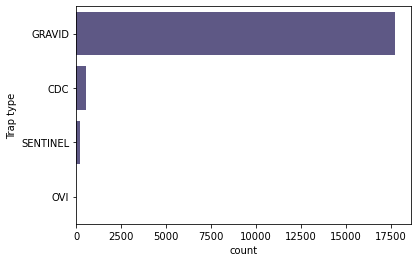

In [32]:
explore_categorical('Trap type', df)

- It is observed from the quick exploratory analysis that the gravid type trap is the most commonly used one, accounting for 96% of all traps used in this experiment. The trap type column can be converted to binary columns for each sub-type of trap using the get dummies function.

- Let's drop the Trap column, as there is no concrete way to make it numerical wihout inflating the number of features we are using.

- The Species type column can be converted to binary columns for each sub-type of trap using the get dummies function.

- It is clear from the above data that compared to any other address, the 100XX W OHARE AIRPORT address has been checked the most number of times. It has a value count that is 5 times higher than the next best address.

- It might be a good idea to have a column in the table that indicates whether any address is the airport address or not. This will be able to tell us the effect that the airport location has on our dependent variable.




In [24]:
species = pd.get_dummies(df['Species'])
trap_type = pd.get_dummies(df['Trap type'])

### Part 3 - Advanced Statistical Analysis
Run a linear regression to determine how the independent variables affect the number of mosquitoes caught. Explain your model construction process. Analyze the model and the results, and discuss the model’s limitations. This may end up being an iterative process.
Note:

You will likely see a low R^2 value, that is to be expected.
This dataset does not respond well to performing VIF analysis, so this is not required.
WNV Present must not be one of your independent variables.

In [50]:
lr_df = pd.concat([df, species, trap_type], axis=1)
lr_df

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,...,Month,is airport,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS,CDC,GRAVID,OVI,SENTINEL
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.977738,...,9,1,0,1,0,0,0,1,0,0
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,...,9,0,0,1,0,0,0,1,0,0
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,...,9,0,0,1,0,0,0,1,0,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,...,9,0,0,1,0,0,0,1,0,0
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,...,9,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18490,2016,36,3XX W 18TH ST,T043,GRAVID,2016-09-09 00:09:00,4,1,CULEX PIPIENS,41.857843,...,9,0,1,0,0,0,0,1,0,0
18491,2007,34,46XX N MILWAUKEE AVE,T003,GRAVID,2007-08-24 00:08:00,19,1,CULEX PIPIENS,41.965376,...,8,0,1,0,0,0,0,1,0,0
18492,2016,30,127XX S DOTY AVE,T115,GRAVID,2016-07-27 00:07:00,34,1,CULEX RESTUANS,41.662395,...,7,0,0,1,0,0,0,1,0,0
18493,2017,33,20XX N DOMINICK ST,T240B,SENTINEL,2017-08-17 00:08:00,50,1,CULEX RESTUANS,41.919197,...,8,0,0,1,0,0,0,0,0,1


In [51]:
show_categorical(lr_df)

There are 5 category features in this dataset.
category features are: ['Address Block' 'Trap' 'Trap type' 'Date' 'Species']


,Address Block,Trap,Trap type,Date,Species
0,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,CULEX RESTUANS
1,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,CULEX RESTUANS
2,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,CULEX RESTUANS
3,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,CULEX RESTUANS
4,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,CULEX RESTUANS


Let's drop the 'Mosquito number', 'Trap type', 'Species', 'Address Block', 'Trap', 'Date' and 'WNV Present' columns from our dataframe.

- Mosquito number, as its the dependent variable and we cannot have a perfect correlation for the regression to work.

- Trap column, as there is no concrete way to make it numerical wihout inflating the number of features we are using.

- Species and Trap type columns, as the values have been binarized and added to the data frame.

- WNV present column, as its a requirement of the business question.

- The month, year and week have been extracted from the date column in the previous excercise (Stats and Public Health 1). Since there are too many discrete values for the date column, Let's drop the date column altogether.

- Address Block column, as there are too many discrete values. The contribution of the airport address is however captured in the 'is airport' column (binary).

In [54]:
X = lr_df.drop(['Mosquito number', 'Trap type', 'Species', 'Address Block', 'Trap', 'Date', 'WNV Present'], axis=1)

y = lr_df['Mosquito number']

X_constant = sm.add_constant(X)

# instantiate the model

lr_model = sm.OLS(y,X_constant)

# fit bp model (find betas)

lr_model_fit = lr_model.fit()

# inspect model

lr_model_fit.summary()

C:\Users\Virajk\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     160.5
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        02:10:34   Log-Likelihood:                -73428.
No. Observations:               18495   AIC:                         1.469e+05
Df Residuals:                   18482   BIC:                         1.470e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1665.9857     92.068    -18.095      0.000   -1846.447   -1485.524
Year                 0.5192      0.029     17.900      0.000       0.462       0.576
Week                -0.0741      0.072     -1.036      0.300      -0.214       0.066
Lat                 -3.6113      1.254     -2.880      0.004      -6.069      -1.153
Lon                -18.4671      1.791    -10.312      0.000     -21.977     -14.957
Month               -0.3294      0.310     -1.061      0.289      -0.938       0.279
is airport           2.4246      0.391      6.196      0.000       1.658       3.192
CULEX PIPIENS     -411.3847     23.014    -17.876      0.000    -456.494    -366.276
CULEX RESTUANS    -412.6191     23.045    -17.905      0.000    -457.789    -367.450
CULEX SALINARIUS  -421.3281     23.009    -18.311      0.000    -466.429    -376.228
CULEX TERRITANS   -420.6537     23.016    -18.277      0.000    -465.767    -375.541
CDC               -409.3108     23.100    -17.719      0.000    -454.589    -364.032
GRAVID            -420.0983     23.173    -18.129      0.000    -465.519    -374.678
OVI               -429.5711     25.209    -17.040      0.000    -478.983    -380.159
SENTINEL          -407.0054     23.182    -17.557      0.000    -452.444    -361.567
==============================================================================
Omnibus:                     4533.454   Durbin-Watson:                   1.553
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8990.053
Skew:                           1.502   Prob(JB):                         0.00
Kurtosis:                       4.625   Cond. No.                     4.39e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.9e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

From the above OLS regression results, the null hypothesis that the Week and month columns have no effect on the dependent variable 'Mosquito number' cannot be rejected due to P values higher that 0.05. Hence it is a good idea to drop the columns entirely to have a better prediction model.

In [58]:
X = lr_df.drop(['Mosquito number', 'Trap type', 'Species', 'Address Block', 'Trap', 'Date', 'WNV Present', 'Week', 'Month'], axis=1)

y = lr_df['Mosquito number']

X_constant = sm.add_constant(X)

# instantiate the model

lr_model = sm.OLS(y,X_constant)

# fit bp model (find betas)

lr_model_fit = lr_model.fit()

# inspect model

lr_model_fit.summary()

C:\Users\Virajk\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     188.2
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        02:15:31   Log-Likelihood:                -73449.
No. Observations:               18495   AIC:                         1.469e+05
Df Residuals:                   18484   BIC:                         1.470e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1647.1961     91.723    -17.958      0.000   -1826.981   -1467.411
Year                 0.5086      0.028     17.992      0.000       0.453       0.564
Lat                 -3.6889      1.255     -2.939      0.003      -6.149      -1.228
Lon                -18.3741      1.793    -10.249      0.000     -21.888     -14.860
is airport           2.4853      0.392      6.346      0.000       1.718       3.253
CULEX PIPIENS     -406.9727     22.929    -17.749      0.000    -451.916    -362.030
CULEX RESTUANS    -407.6933     22.956    -17.759      0.000    -452.690    -362.697
CULEX SALINARIUS  -416.5332     22.923    -18.171      0.000    -461.465    -371.602
CULEX TERRITANS   -415.9969     22.930    -18.142      0.000    -460.941    -371.053
CDC               -404.9250     23.014    -17.595      0.000    -450.034    -359.816
GRAVID            -415.6664     23.090    -18.002      0.000    -460.926    -370.407
OVI               -423.7183     25.127    -16.863      0.000    -472.970    -374.467
SENTINEL          -402.8864     23.101    -17.440      0.000    -448.166    -357.607
==============================================================================
Omnibus:                     4562.109   Durbin-Watson:                   1.549
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9087.107
Skew:                           1.509   Prob(JB):                         0.00
Kurtosis:                       4.639   Cond. No.                     8.18e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.12e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

As expected, the R^2 values are very small (0.092)

### Run a logistic regression to determine how the independent variables affect West Nile Virus presence. Explain your model construction process. Analyze the model and the results, and discuss the model’s limitations. This may end up being an iterative process.

 Note: Mosquito number should be one of your independent variables.

In [59]:
log_df = pd.concat([df, species, trap_type], axis=1)
log_df

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,...,Month,is airport,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS,CDC,GRAVID,OVI,SENTINEL
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.977738,...,9,1,0,1,0,0,0,1,0,0
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,...,9,0,0,1,0,0,0,1,0,0
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,...,9,0,0,1,0,0,0,1,0,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,...,9,0,0,1,0,0,0,1,0,0
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,...,9,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18490,2016,36,3XX W 18TH ST,T043,GRAVID,2016-09-09 00:09:00,4,1,CULEX PIPIENS,41.857843,...,9,0,1,0,0,0,0,1,0,0
18491,2007,34,46XX N MILWAUKEE AVE,T003,GRAVID,2007-08-24 00:08:00,19,1,CULEX PIPIENS,41.965376,...,8,0,1,0,0,0,0,1,0,0
18492,2016,30,127XX S DOTY AVE,T115,GRAVID,2016-07-27 00:07:00,34,1,CULEX RESTUANS,41.662395,...,7,0,0,1,0,0,0,1,0,0
18493,2017,33,20XX N DOMINICK ST,T240B,SENTINEL,2017-08-17 00:08:00,50,1,CULEX RESTUANS,41.919197,...,8,0,0,1,0,0,0,0,0,1


<AxesSubplot:>

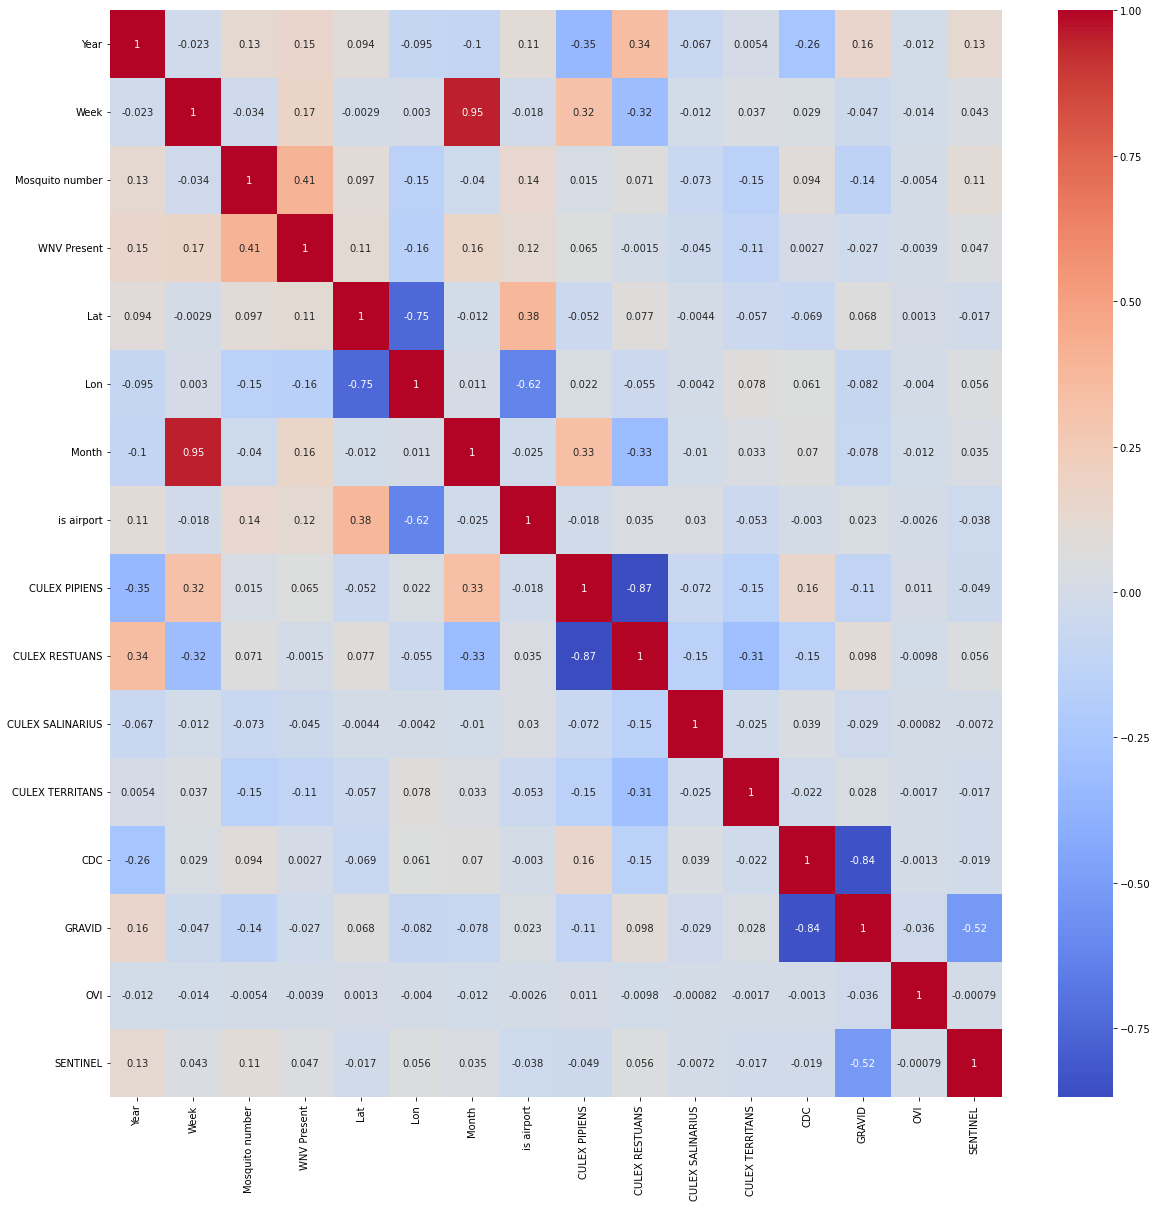

In [60]:
plt.figure(figsize = (20,20))

# Check correlations
sns.heatmap(log_df.corr(), annot=True, cmap='coolwarm')

From the correlation heatmap, we can see that 

- the Lat and Lon columns have a strong correlation with each other. We should remove both as they usually are clubbed together as a pair.
- Culex Pipiens and Culex Restuans have a strong negative correlation. We should remove one of them.
- is airport has a decent correlation with Lon column.
- OVI column should be removed, as only one OVI trap has been checked during the duration of the whole experiment. Low row count.

In [65]:

X = log_df.drop(['Trap type', 'Species', 'Address Block', 
                 'Trap', 'Date', 'Month', 'CDC', 'Lon', 
                 'OVI', 'WNV Present', 'Lat', 'is airport','CULEX PIPIENS'], axis=1)
X
y = log_df['WNV Present']
y
X_constant = sm.add_constant(X)

# instantiate the model

log_model = sm.Logit(y,X_constant)

# fit bp model (find betas)

log_model_fit = log_model.fit()

# inspect model

log_model_fit.summary()

#  'CULEX PIPIENS',
#        'CULEX RESTUANS', 'CULEX SALINARIUS', 'CULEX TERRITANS', 'GRAVID'

Optimization terminated successfully.
         Current function value: 0.411060
         Iterations 8


C:\Users\Virajk\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18486
Method:                           MLE   Df Model:                            8
Date:                Mon, 16 May 2022   Pseudo R-squ.:                  0.2121
Time:                        02:31:52   Log-Likelihood:                -7602.6
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -236.6976     13.470    -17.572      0.000    -263.099    -210.297
Year                 0.1141      0.007     16.992      0.000       0.101       0.127
Week                 0.1465      0.006     26.110      0.000       0.136       0.158
Mosquito number      0.0673      0.001     46.628      0.000       0.064       0.070
CULEX RESTUANS      -0.2452      0.051     -4.792      0.000      -0.346      -0.145
CULEX SALINARIUS    -0.9154      0.321     -2.852      0.004      -1.544      -0.286
CULEX TERRITANS     -2.5469      0.274     -9.284      0.000      -3.085      -2.009
GRAVID               0.3268      0.135      2.425      0.015       0.063       0.591
SENTINEL            -0.3358      0.219     -1.533      0.125      -0.765       0.094
====================================================================================
"""

Based on the above Logit regression results, the column with a high P value (>0.05) is the SENTINEL column.It should be removed for a better regression model.

In [66]:
X = log_df.drop(['Trap type', 'Species', 'Address Block', 
                 'Trap', 'Date', 'Month', 'CDC', 'Lon', 
                 'OVI', 'WNV Present', 'Lat', 'is airport','CULEX PIPIENS','SENTINEL'], axis=1)
X
y = log_df['WNV Present']
y
X_constant = sm.add_constant(X)

# instantiate the model

log_model = sm.Logit(y,X_constant)

# fit bp model (find betas)

log_model_fit = log_model.fit()

# inspect model

log_model_fit.summary()

#  'CULEX PIPIENS',
#        'CULEX RESTUANS', 'CULEX SALINARIUS', 'CULEX TERRITANS', 'GRAVID'

Optimization terminated successfully.
         Current function value: 0.411123
         Iterations 8


C:\Users\Virajk\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18487
Method:                           MLE   Df Model:                            7
Date:                Mon, 16 May 2022   Pseudo R-squ.:                  0.2120
Time:                        02:33:49   Log-Likelihood:                -7603.7
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -231.9116     13.086    -17.722      0.000    -257.559    -206.264
Year                 0.1117      0.007     17.138      0.000       0.099       0.124
Week                 0.1462      0.006     26.068      0.000       0.135       0.157
Mosquito number      0.0673      0.001     46.662      0.000       0.065       0.070
CULEX RESTUANS      -0.2501      0.051     -4.900      0.000      -0.350      -0.150
CULEX SALINARIUS    -0.9214      0.322     -2.865      0.004      -1.552      -0.291
CULEX TERRITANS     -2.5481      0.274     -9.289      0.000      -3.086      -2.010
GRAVID               0.4552      0.107      4.253      0.000       0.245       0.665
====================================================================================
"""

In [71]:
X.columns

Index(['Year', 'Week', 'Mosquito number', 'CULEX RESTUANS', 'CULEX SALINARIUS',
       'CULEX TERRITANS', 'GRAVID'],
      dtype='object')

The above model has low P values hence the null hypothesis that the columns 'Year', 'Week', 'Mosquito number', 'CULEX RESTUANS','CULEX SALINARIUS','CULEX TERRITANS'and 'GRAVID' have no effect on the dependent variable can be rejected.

It is a good idea to check the correlations between the columns once again before we proceed to calculate the effectiveness of the model.

<AxesSubplot:>

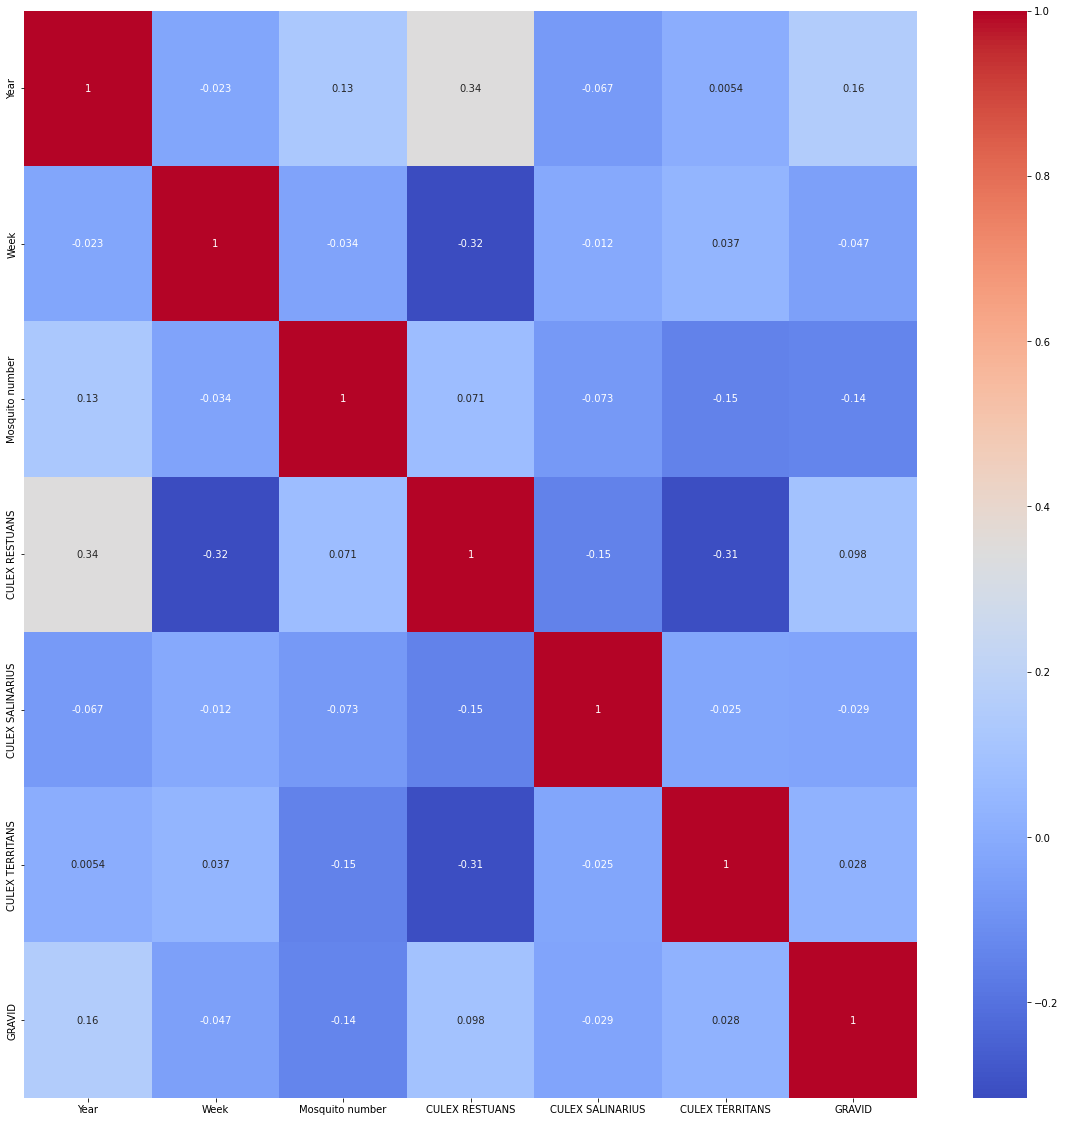

In [67]:
plt.figure(figsize = (20,20))
# Check correlations
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')

In [72]:
# Make probability predictions
y_pred = log_model_fit.predict(X_constant)

# Round soft predictions
y_threshold = np.where(y_pred >= 0.5, 1, 0)

# Check for agreement with original y
n_correct = (y_threshold == y).sum()

# Calculate percentage (accuracy)
print(n_correct/len(y)*100.00)

80.92998107596647


We see that our model is ~80.93% accurate. This seems to be a good model. We have left many variables in our model which are not significant (or have small coefficients) - it is likely possible to achieve similar accuracy with less data, requiring only a simpler model.

## CONCLUSION AND IMPROVEMENTS

- It is possible to predict with some accuracy based on the given data whether a given sample will have a WNV positive mosquito in it.


- Mosquito species seem to have an effect on the presence of the WNV status of the sample. Low P values cause some species to be removed from being considered for logistic regression altogether. This needs to be investigated further.


- A way to make sure the convert the trap id column from categorical to numerical should be implemented. A possible way could be that some traps have 50 or more mosquitoes when checked- on more than 20 occasions during the duration of the experiment. We can add a parameter that indicates whether for the trap in question, this condition has been met(binary).


- Something similar could be done with the hour of the day (Morning, Afternoon and Evening).